**PROYECTO XG-BOOST**

**In-vehicle coupon recommendation Data Set**

**CONJUNTO DE DATOS:**

https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('../Data/in-vehicle-coupon-recommendation.csv') 

In [5]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
df.shape

(12684, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [8]:
# observando el número de características de las columnas numéricas
df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [9]:
''' Combinando dos atributos: toCoupon_GEQ15min, toCouponGEQ25min
            0: time to coupon < 15min
            1: 15 <= time to coupon < 25
            2: time to coupon >= 25
'''
to_coupon = df[['toCoupon_GEQ15min', 'toCoupon_GEQ25min']].to_numpy()
t = np.sum(to_coupon, axis=1)
X_toCoupon = pd.Series(data = np.sum(to_coupon, axis = 1), name='toCoupon')

# Volviendo a Dataframe
X_toCoupon_1 = pd.DataFrame(X_toCoupon)
X_toCoupon_1.head()

,toCoupon
0,0
1,0
2,1
3,1
4,1


**Eliminaremos las variable "car", presenta demasiados valores nulos, "toCoupon_GEQ5min" debido a que presenta solo un valor y no aporta al modelo** 

In [10]:
# Creando las columnas con las variables eliminadas
# Separando las variables "numéricas" y "categóricas"

columnsCategoric = ['destination','passanger','weather','time','coupon','expiration','gender','age',
               'maritalStatus','education','occupation','income','Bar','CoffeeHouse','CarryAway',
               'RestaurantLessThan20','Restaurant20To50']
columnsNumeric   = ['temperature','has_children','direction_same','direction_opp'] 

In [11]:
# Concatenaremos los dataframe "df[columnsNumeric]" y "X_toCoupon_1"
df_Numericos = pd.concat([df[columnsNumeric], X_toCoupon_1], axis=1)
df_Numericos.shape

(12684, 5)

# Imputando valores faltantes con el Método Simple.Imputer

In [12]:
# No existen valores nulos en las variables numéricas:
df_Numericos.isnull().sum()

temperature       0
has_children      0
direction_same    0
direction_opp     0
toCoupon          0
dtype: int64

In [13]:
# Si existen valores nulos en las variables categóricas:
df[columnsCategoric].isnull().sum()

destination               0
passanger                 0
weather                   0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64

In [15]:
# Imputando con el metodo Simple.Imputer
from sklearn.impute import SimpleImputer

# Generamos el imputador iterativo - Imputacion Univariado Categorica
imp_cat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# Generamos los subset de variables a imputar
data_impt_cat = df[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']]

# Realizamos la imputacion univariada en una nueva base de datos V.Categoticas
imp_cat.fit(data_impt_cat)
imputed_data_cat = pd.DataFrame(data = imp_cat.transform(data_impt_cat),
                columns = data_impt_cat.columns, dtype ='object')

# Comprobando que ya no existen valores nulos en las variables categóricas
imputed_data_cat.isnull().sum()

Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64

In [16]:
# Creando una arreglo de las variables categóricas que no tiene valores nulos
columnsCategoric_no_null = ['destination','passanger','weather','time',
                            'coupon','expiration','gender','age','maritalStatus',
                            'education','occupation','income']

data_categ_no_null = pd.DataFrame(df[columnsCategoric_no_null])
data_categ_no_null.shape

(12684, 12)

In [17]:
# Concatenamos los dos subsets: "imputed_data_univ_cat" y "data_categ_no_null"

df_categorica_limpia = pd.concat([imputed_data_cat, data_categ_no_null], axis = 1)

# Data categórica sin ningún valor nulo
df_categorica_limpia.isnull().sum()

Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
destination             0
passanger               0
weather                 0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
education               0
occupation              0
income                  0
dtype: int64

In [18]:
df_categorica_limpia.shape

(12684, 17)

In [19]:
# observando el número de características de las columnas categóricas
df_categorica_limpia.select_dtypes('object').nunique()

Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
destination              3
passanger                4
weather                  3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
education                6
occupation              25
income                   9
dtype: int64

# One hot encoding

In [20]:
# Tratamiento de variables categoricas (O-H-E)
one_hot_encoding = pd.get_dummies(df_categorica_limpia, columns = ['destination','passanger','weather','time',
                                                            'coupon','expiration','gender','age','maritalStatus',
                                                            'education','occupation','income','Bar','CoffeeHouse',
                                                            'CarryAway','RestaurantLessThan20','Restaurant20To50'])
one_hot_encoding.head()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [21]:
# Concatenamos las variables categóricas con las variables numéricas
df_concat_1 = pd.concat([one_hot_encoding, df_Numericos], axis=1)
df_concat_1.shape

(12684, 107)

In [23]:
# Concatenamos df_concat_1 con el target "Y"
df_concat_2 = pd.concat([df_concat_1, df['Y']], axis=1)
df_concat_2.shape

(12684, 108)

# Balanceo por el método SMOTE

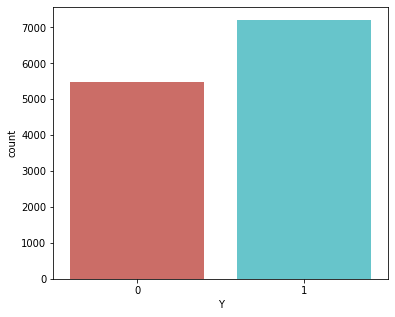

In [24]:
# Observando los datos sin balancear
plt.figure(figsize=(6,5))
sns.countplot(x='Y', data = df_concat_2, palette = 'hls')
plt.show()

In [25]:
# Observando la cantidad de por característica
df_concat_2['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [26]:
# Separando la variables predictoras y la variable predictiva 
X = df_concat_2.drop(['Y'], axis=1)
y = df_concat_2['Y'].copy()
X.shape, y.shape

((12684, 107), (12684,))

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_sm.shape, y_sm.shape

((14420, 107), (14420,))

In [28]:
y_sm.value_counts()

1    7210
0    7210
Name: Y, dtype: int64

# Estandarizando

In [30]:
# Standarizando las variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X_sm)
X_scaler = pd.DataFrame(X_scaler)
X_scaler.columns = X.columns

In [31]:
X1 = X_sm.copy()
y1 = y_sm.copy()
X1.shape, y1.shape

((14420, 107), (14420,))

# Selección de variables importantes

In [32]:
X1.columns[X1.columns.str.contains("[\[\]<]")]

Index(['coupon_Restaurant(<20)'], dtype='object')

In [33]:
X1.columns = X1.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [34]:
# Selección de variables importantes por XG Boost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 100)
xgb.fit(X1, y1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# Selección de variables importantes por Random Forest
xgb.feature_importances_

array([0.00046751, 0.02830078, 0.00887239, 0.00859691, 0.02203814,
       0.00538224, 0.02118934, 0.00848203, 0.        , 0.02507002,
       0.00908011, 0.01541733, 0.00883546, 0.00877698, 0.        ,
       0.02440834, 0.04996286, 0.01139369, 0.        , 0.05790219,
       0.0311708 , 0.03559778, 0.01488366, 0.0098079 , 0.00990278,
       0.00376111, 0.00945274, 0.00375582, 0.00467055, 0.00089246,
       0.00449316, 0.00393168, 0.        , 0.00481007, 0.01049334,
       0.00488938, 0.        , 0.00389919, 0.        , 0.00683562,
       0.00543643, 0.00432652, 0.00758651, 0.01150245, 0.00222579,
       0.        , 0.        , 0.        , 0.        , 0.00646662,
       0.01206194, 0.        , 0.        , 0.00483864, 0.00664088,
       0.00466719, 0.        , 0.00402006, 0.006067  , 0.00325157,
       0.        , 0.        , 0.00475058, 0.        , 0.00484118,
       0.00410678, 0.00376791, 0.01071366, 0.00463565, 0.00625925,
       0.00753537, 0.00580405, 0.00728926, 0.        , 0.00951

In [ ]:
# Creando tabla de Importancia de Variables
TablaImportancia = pd.concat([pd.DataFrame({'Features': list(X1)}),
                              pd.DataFrame({'Importancia': list(xgb.feature_importances_)})], axis = 1)
ImportVariables = TablaImportancia[['Features','Importancia']].sort_values('Importancia',ascending=True).reset_index(drop=True)
ImportVariables.head(20)

,Features,Importancia
0,occupation_Personal Care & Service,0.0
1,occupation_Community & Social Services,0.0
2,occupation_Computer & Mathematical,0.0
3,occupation_Farming Fishing & Forestry,0.0
4,occupation_Food Preparation & Serving Related,0.0
5,education_Bachelors degree,0.0
6,maritalStatus_Widowed,0.0
7,occupation_Legal,0.0
8,maritalStatus_Divorced,0.0
9,occupation_Building & Grounds Cleaning & Maint...,0.0


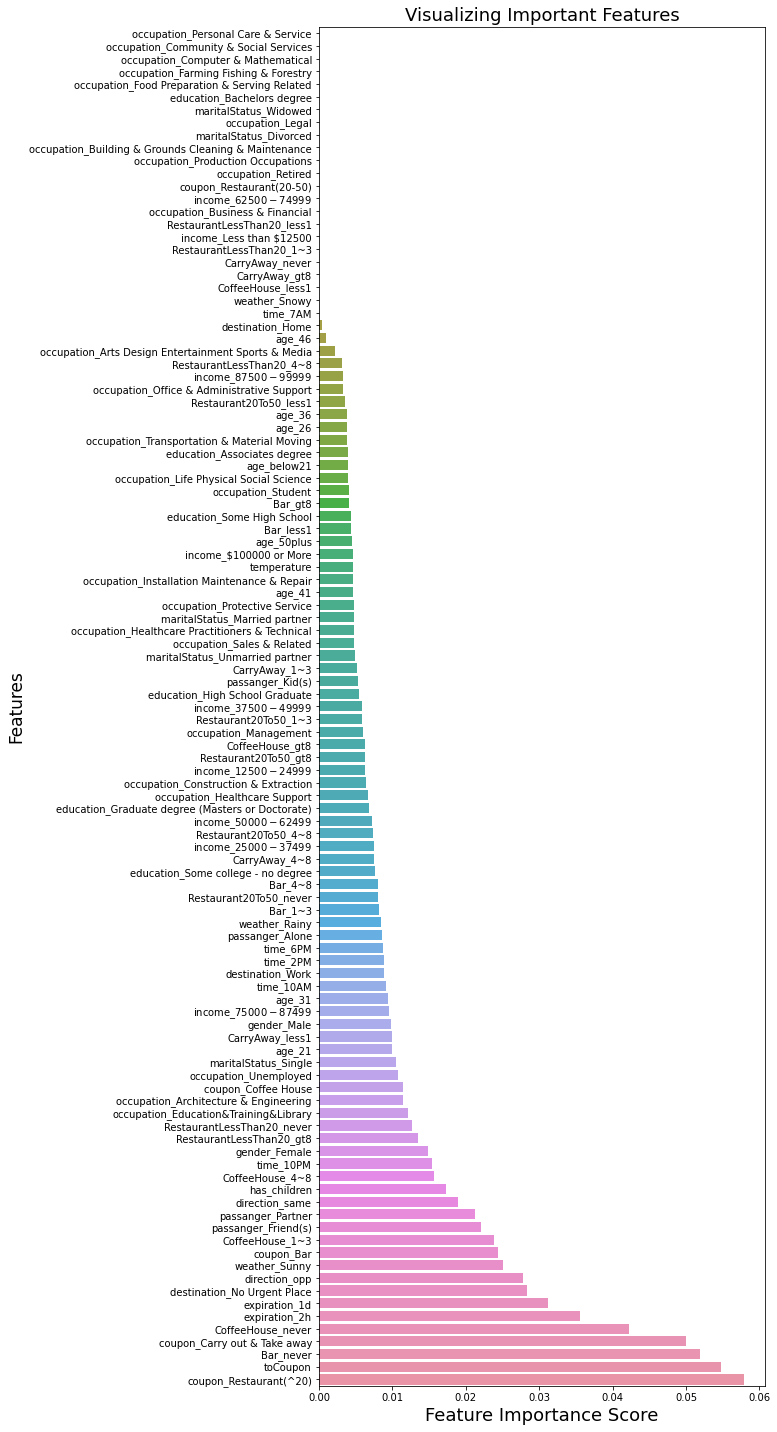

In [ ]:
# Gráfica de Variables importantes 
plt.figure(figsize = (8,25))
sns.barplot(x = ImportVariables['Importancia'], y = ImportVariables['Features'])
plt.xlabel('Feature Importance Score',fontsize=18)
plt.ylabel('Features', fontsize=17)
plt.title("Visualizing Important Features",fontsize=18)
plt.show()

In [ ]:
# Eliminando variables menos importantes
X2 = X1.drop(['direction_opp', 'time_7AM', 'gender_Male', 'expiration_2h',
              'occupation_Building & Grounds Cleaning & Maintenance'], axis=1)

X2.shape, y1.shape

((14420, 102), (14420,))

In [ ]:
# Partición de Datos: Train, Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y1, stratify = y1,
                                                    test_size = 0.3, random_state = 100)

In [ ]:
# Cantidad de datos de entrenamiento 
X_train.shape, y_train.shape

((10094, 102), (10094,))

# Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {  'objective':['binary:logistic'],
                'max_depth'  :    list(range(6, 8)), 
                'subsample': [0.6, 0.8, 1.0],
                'learning_rate'  : [0.3, 0.1, 0.03], 
                'gamma': [0.5, 1, 1.5, 2, 5],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'n_estimators'  : list(range(80,90,4))}

In [ ]:
# Definiendo el modelo
model_xgb = XGBClassifier(random_state = 100)

In [ ]:
# Ejecutando Grid Search
import time
inicio = time.time()

GridSearch = GridSearchCV(model_xgb, parameters,
                          cv = 5,
                          n_jobs = -1,
                          scoring  = 'accuracy',
                          refit = True,
                          return_train_score = True)

GridSearch.fit(X_train, y_train.ravel())

fin = time.time()
print('El tiempo de ejecución es: ', (fin-inicio)/60, 'minutos') 

El tiempo de ejecución es:  180.01827033758164 minutos


In [ ]:
# Mejores parámetros:
print('Los mejores parámetros son :', GridSearch.best_params_)
print('Con el mejor accuracy : ', GridSearch.best_score_)

Los mejores parámetros son : {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 84, 'objective': 'binary:logistic', 'subsample': 0.8}
Con el mejor accuracy :  0.787597359279118


# Entrenando el modelo XG-BOOST

In [ ]:
from xgboost import XGBClassifier

xgbc=XGBClassifier( 
                    subsample = 0.9,
                    min_child_weight = 5,
                    n_estimators = 84,
                    colsample_bytree = 1,
                    gamma = 0.5,
                    max_depth = 6,
                    learning_rate = 0.05,
                    criterion = 'accuracy',
                    objective = 'binary:logistic', 
                    n_jobs = -1,
                    random_state = 100)
 
xgbc.fit(X_train, y_train)

XGBClassifier(criterion='accuracy', gamma=0.5, learning_rate=0.05, max_depth=6,
              min_child_weight=5, n_estimators=84, n_jobs=-1, random_state=100,
              subsample=0.9)

In [ ]:
# Entrenando el algoritmo para validar
y_predict_train = xgbc.predict(X_train)   # Predicción sobre el train
y_predict_test  = xgbc.predict(X_test)    # Predicción sobre el test 

In [ ]:
from sklearn.metrics import accuracy_score
# Calculando el Accurary 
print('Accuracy Train :', accuracy_score(y_train, y_predict_train))
print('Accuracy Test  :', accuracy_score(y_test, y_predict_test))

Accuracy Train : 0.7965127798692292
Accuracy Test  : 0.7630605640314378


In [ ]:
# Calculando la precisión 
from sklearn.metrics import precision_score
print('Precisión train :', precision_score(y_train, y_predict_train))
print('Precisión test  :', precision_score(y_test, y_predict_test))

Precisión train : 0.7901880938530154
Precisión test  : 0.7595802919708029


In [ ]:
# Calculando el recall
from sklearn.metrics import recall_score
print('Recall train :', recall_score(y_train, y_predict_train))
print('Recall test  :', recall_score(y_test, y_predict_test))

Recall train : 0.8074103427778878
Recall test  : 0.7697642163661581


Cuadro Comparativo para train:

In [ ]:
from sklearn.metrics import classification_report
report_train = classification_report(y_train, y_predict_train)
print(report_train) 

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      5047
           1       0.79      0.81      0.80      5047

    accuracy                           0.80     10094
   macro avg       0.80      0.80      0.80     10094
weighted avg       0.80      0.80      0.80     10094



Cuadro Comparativo para test:

In [ ]:
report_test = classification_report(y_test, y_predict_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2163
           1       0.76      0.77      0.76      2163

    accuracy                           0.76      4326
   macro avg       0.76      0.76      0.76      4326
weighted avg       0.76      0.76      0.76      4326



In [ ]:
from sklearn.metrics import confusion_matrix
# Matriz de confusión train 
m_confusion_train = confusion_matrix(y_train, y_predict_train)
print('Matriz de Confusión train:')
m_confusion_train

Matriz de Confusión train:


array([[3965, 1082],
       [ 972, 4075]])

[Text(0, 0.5, 'Si producto'), Text(0, 1.5, 'No producto')]

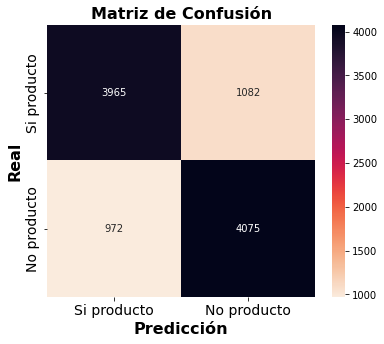

In [ ]:
plt.figure(figsize=(6,5)) 
ax= plt.subplot()
sns.heatmap(m_confusion_train, annot=True, ax = ax, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='g')
ax.set_xlabel('Predicción', fontweight='bold', fontsize=16)
ax.set_ylabel('Real', fontsize=16, fontweight='bold')
ax.set_title('Matriz de Confusión', fontsize=16, fontweight='bold')
ax.xaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
ax.yaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)

In [ ]:
# Matriz de confusión test 
m_confusion_test = confusion_matrix(y_test, y_predict_test)
print('Matriz de Confusión test:')
m_confusion_test

Matriz de Confusión test:


array([[1636,  527],
       [ 498, 1665]])

[Text(0, 0.5, 'Si producto'), Text(0, 1.5, 'No producto')]

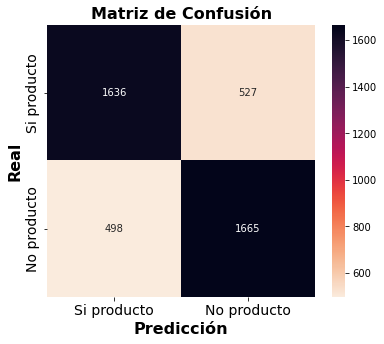

In [ ]:
plt.figure(figsize=(6,5)) 
ax= plt.subplot()
sns.heatmap(m_confusion_test, annot=True, ax = ax, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='g')
ax.set_xlabel('Predicción', fontweight='bold', fontsize=16)
ax.set_ylabel('Real', fontsize=16, fontweight='bold')
ax.set_title('Matriz de Confusión', fontsize=16, fontweight='bold')
ax.xaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
ax.yaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)

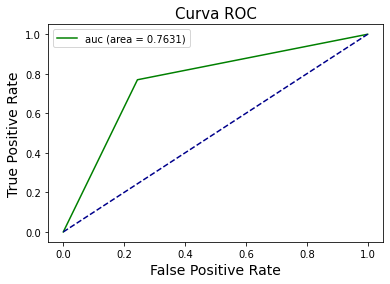

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_predict_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, color = 'green', label = 'auc (area = %0.4f)' % auc) 
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('Curva ROC', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend()
plt.show()

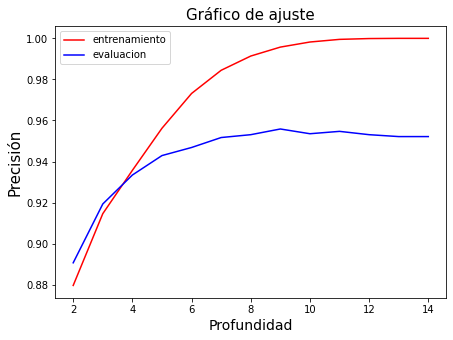

In [ ]:
# Gráfico de ajuste
train_predict = []
test_predict  = []
max_deep_list = list(range(2, 15))

for deep in max_deep_list:
    arbol = XGBClassifier(n_estimators = 84,
                                   max_depth = deep, 
                                   max_features = 5,
                                   criterion = 'gini',
                                   bootstrap = True,       # muestreo aleatorio
                                   oob_score = True,
                                   n_jobs = -1,
                                   random_state = 100)
    
    arbol.fit(X_train, y_predict_train)
    train_predict.append(arbol.score(X_train, y_predict_train))
    test_predict.append(arbol.score(X_test,  y_predict_test))

# Gráfica de los resultados
plt.figure(figsize = (7,5))
plt.plot(max_deep_list, train_predict, color = 'red', label ='entrenamiento')
plt.plot(max_deep_list, test_predict, color = 'blue', label ='evaluacion')
plt.title('Gráfico de ajuste', fontsize=15)
plt.ylabel('Precisión', fontsize=15)
plt.xlabel('Profundidad', fontsize=14)
plt.legend()
plt.show()